# Stokes firstand second problem

Preliminaries:

In [137]:
%matplotlib notebook

import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.animation
from scipy.special import erf
from IPython import display

## 1st Problem: Impusively started plate

Error function

<IPython.core.display.Javascript object>


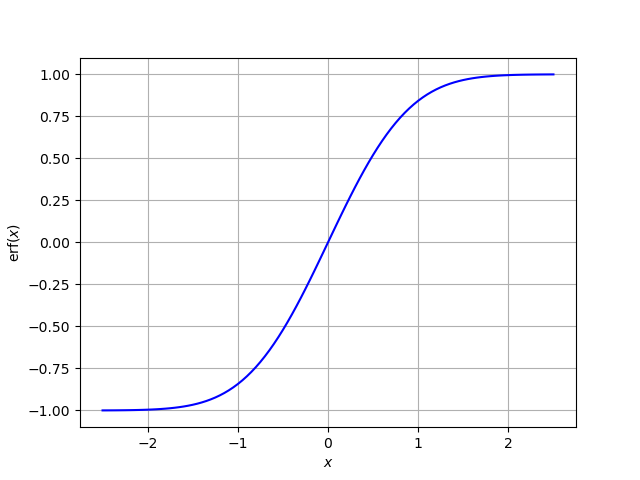

In [138]:
x=np.linspace(-2.5,2.5,101);
plt.figure()
plt.xlabel(f'$x$')
plt.ylabel(f'erf$(x)$')
plt.plot( x, erf(x),'b')
plt.grid()
plt.show()

### 4. Interactive plot 1

Adjust the ellipse by moving the sliders for the half axes $a$ and $b$:

In [139]:
def update_ell1(a, b):
    c = np.sqrt(a**2-b**2)
    t = np.linspace(0, 2*np.pi, 100)
    e=np.sqrt(a**2-b**2)/a

    ell.set_data( a*np.cos(t) , b*np.sin(t)) 
    f1.set_data([c,-c],[0,0])
    ee.set_text(f'$e$={e:.2f} ')
    plt.show()

<IPython.core.display.Javascript object>


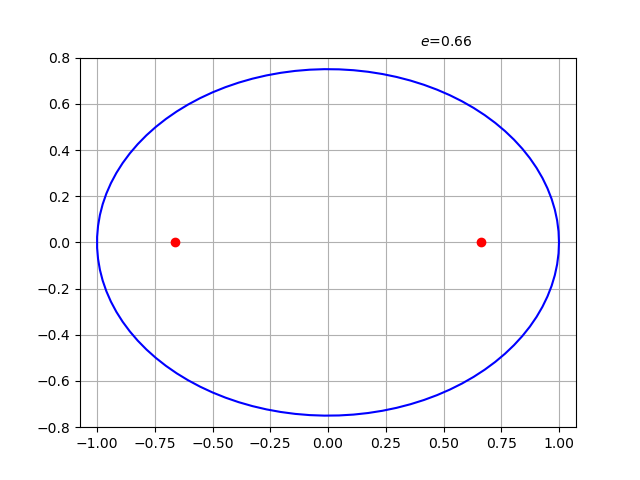

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0, step=0.01), FloatSlider(value=0.75, des…

In [140]:
fig,ax = plt.subplots(1)

ax.axis('equal')
ax.grid(True)
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-0.8, 0.8])

ell, = ax.plot(1,1,color='b')
f1,  = ax.plot(1,1,color='r',marker='o',linestyle=' ')
ee = ax.text(0.4, 0.85, f'')

widgets.interact(update_ell1, \
         a=widgets.FloatSlider(min=0,max=1,step=0.01,value=1, description='a'), \
         b=widgets.FloatSlider(min=0,max=1,step=0.01,value=0.75, description='b') );

### 5. Interactive plot 2

Adjust the ellipse by moving the sliders for the eccentricity $e$, scale $d$ and phase shift $\delta$:

## Stokes second problem
The solution to Stokes second problem in non-dimensional form is written as follows:

<IPython.core.display.Javascript object>


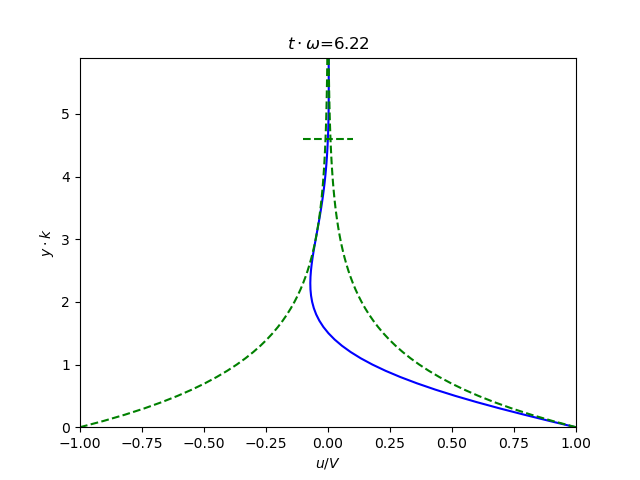

In [141]:
yk = np.arange(0,6,0.1)
dk = 4.6
tmax=2*np.pi # period
tom=np.arange(0,tmax,tmax/100)

u = lambda tom : np.exp(-yk)*np.cos(yk-tom);
um = np.exp(-yk);

fig,ax = plt.subplots(1)
ell, = ax.plot([],[],color='b')

def init():
    ax.set_xlim([-1, 1])
    ax.set_ylim([0, yk[-1]])
    ax.plot(um, yk,'g--')
    ax.plot(-um, yk,'g--')
    ax.plot([-0.1,0.1],[dk,dk],'g--')
    ax.set_xlabel(f'$u / V$')
    ax.set_ylabel(f'$y \cdot k$')    
def animate(j):
    ell.set_data(u(tom[j]),yk)
    ax.set_title(f'$t \cdot \omega$={tom[j]:.2f}')
    return ell,ax
                
ani=matplotlib.animation.FuncAnimation(fig, animate, frames=tom.size, init_func=init, repeat=False,blit=True,interval=10)


In [142]:
# convert to html5 video
# plt.rcParams['animation.ffmpeg_path'] = '/path_to_your/ffmpeg'
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
